In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# IMPORT DATA
def Read_Two_Column_File(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y.append(float(p[1]))

    return x, y

(0.148, 2.880615e-05)

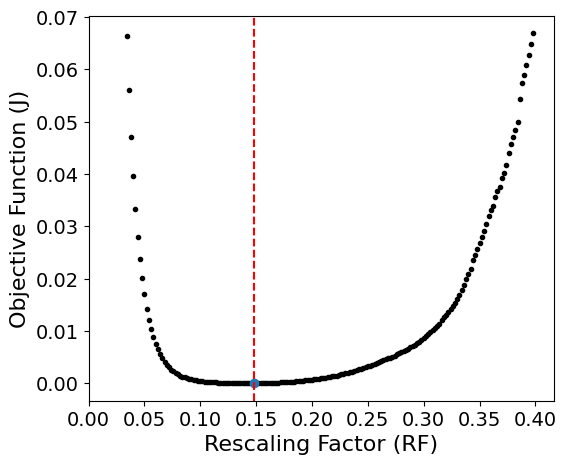

In [15]:
def minimum(x, y, savename, **kwargs):
    #y_index = y.index(min(y))
    min_x = x[y.index(min(y))]
    min_y = min(y)
    
    plt.subplots(figsize=(6, 5))
    plt.scatter(x , y, color = "black", marker=".")
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.scatter(min_x, min_y)
    plt.axvline(x=min_x, color='r', linestyle='--')
    plt.xlabel("Rescaling Factor (RF)", fontsize=16)
    plt.ylabel("Objective Function (J)", fontsize=16)
    plt.xticks(kwargs["ticks"])
    plt.savefig(savename, dpi = 300, bbox_inches = 'tight')

    return min_x, min_y

x1, y1 = Read_Two_Column_File('paper_evn_sweeping_1/data.txt')
x2 = []
y2 = []
for i in range(len(y1)):
    if y1[i] < y1[-1]:
        x2.append(x1[i])
        y2.append(y1[i])

minimum(x2, y2, savename="paper_evn_sweeping_1/redone_opt_evn_factor_cut.png", ticks=np.linspace(0.0, 0.45, 9, endpoint=False))

(0.148, 2.880615e-05)

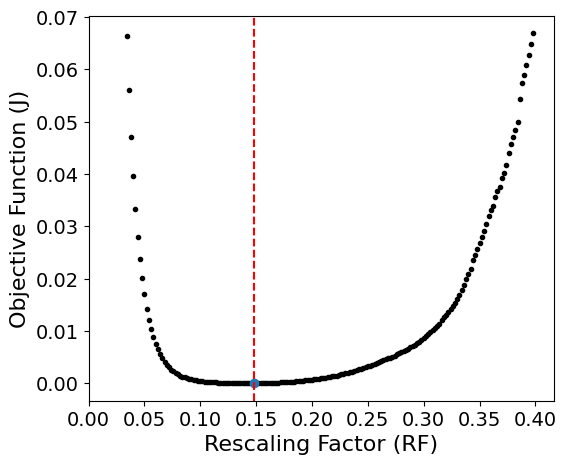

In [14]:
# cut x1 and y1 and create new x2 and y2 with only the values that are less than y1[-1]



(0.2565, 2.101688e-05)

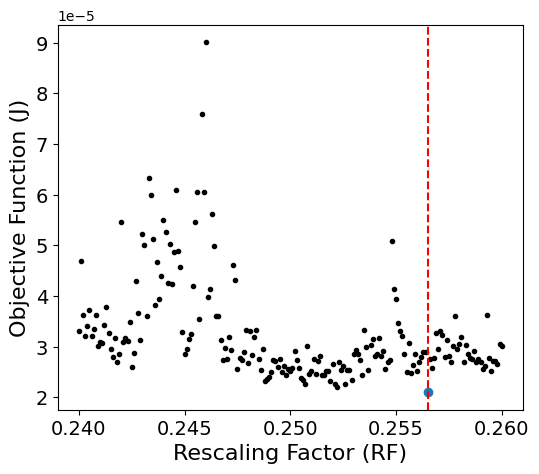

In [ ]:
x2, y2 = Read_Two_Column_File('evn_final_sweeping_2/data.txt')
minimum(x2, y2, savename="evn_final_sweeping_2/redone_opt_evn_factor_2.png", ticks=np.arange(0.24, 0.26, 0.005))

In [ ]:
from simsopt.geo import CurveXYZFourier, SurfaceRZFourier, curves_to_vtk
import numpy as np
phi = np.linspace(0, 1, 256, endpoint=True)
theta = np.linspace(0, 1, 256, endpoint=True)
surface = SurfaceRZFourier(1, True, mpol = 1, ntor = 0, quadpoints_phi=phi, quadpoints_theta=theta)
surface.set_dofs([1, 0.37, 0.37])
surface.to_vtk("torus", )
surface.to_vtk("torus")

curve = CurveXYZFourier(50, order=1)
curve.set_dofs([1, 0, 0.7, 0, 0, 0, 0, 0.7, 0])
curves_to_vtk([curve], "curve", close=True)
